=== Data Shape ===
Rows: 927, Columns: 2

=== First 5 Rows ===
  observation_date  UNRATE
0       1948-01-01     3.4
1       1948-02-01     3.8
2       1948-03-01     4.0
3       1948-04-01     3.9
4       1948-05-01     3.5

=== Data Types ===
observation_date    datetime64[ns]
UNRATE                     float64
dtype: object

=== Missing Values ===
observation_date    0
UNRATE              0
dtype: int64

=== Statistical Summary ===
count    927.000000
mean       5.678317
std        1.708584
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: unemp_rate, dtype: float64


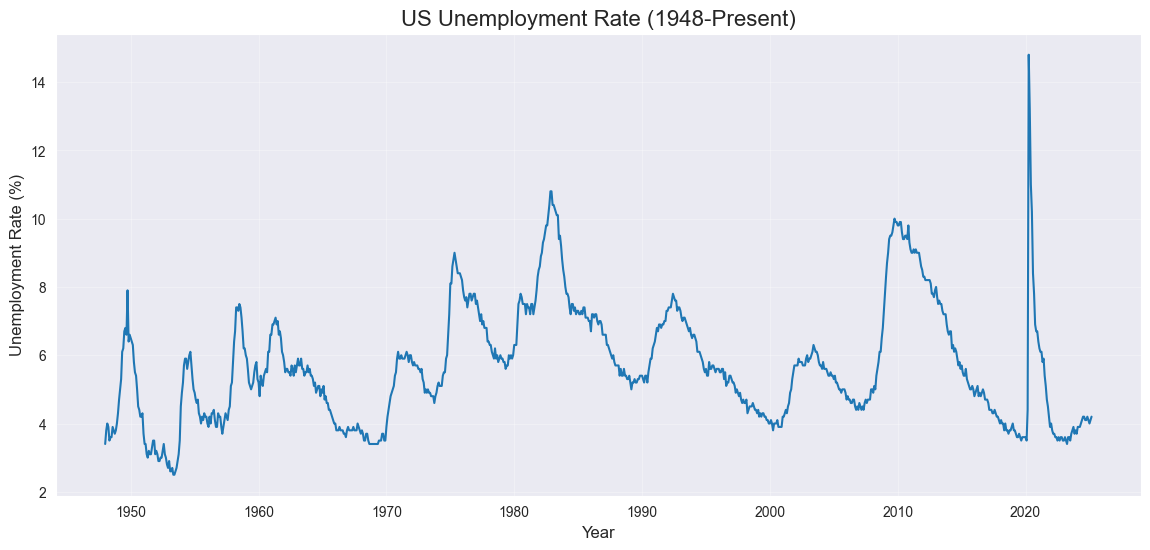

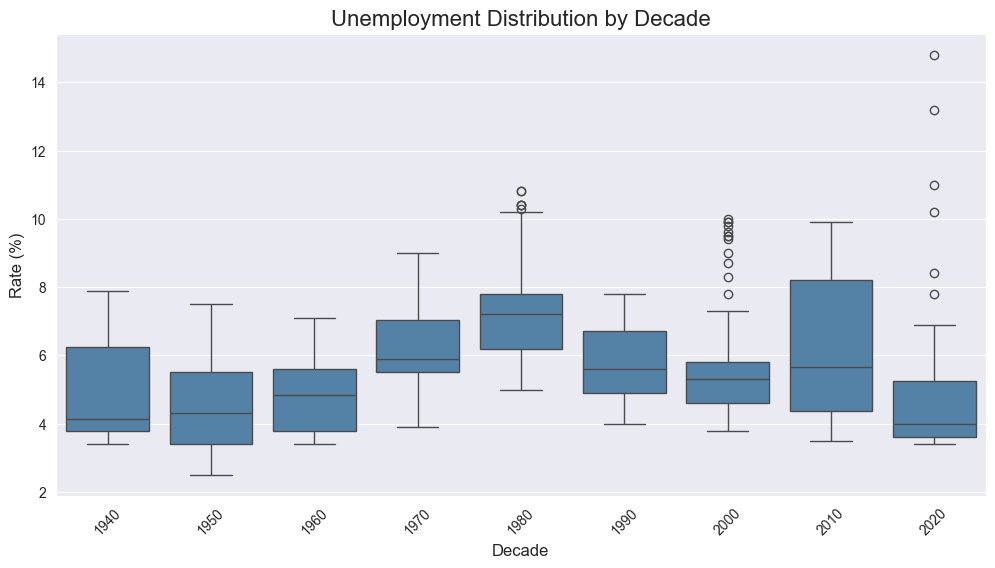

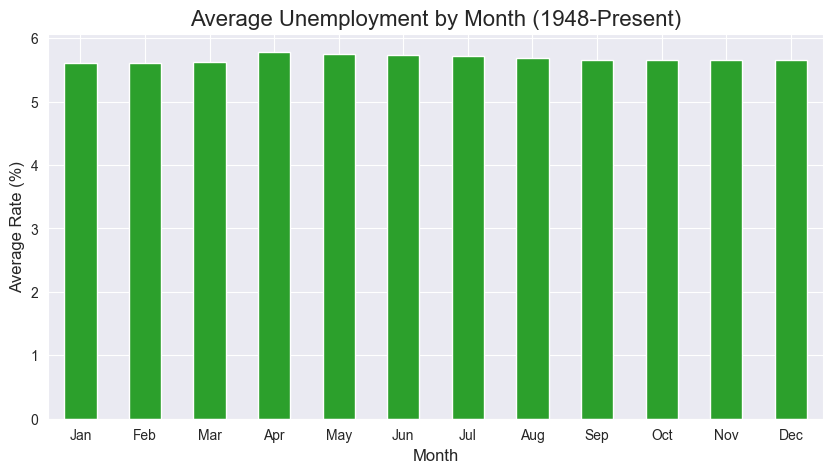

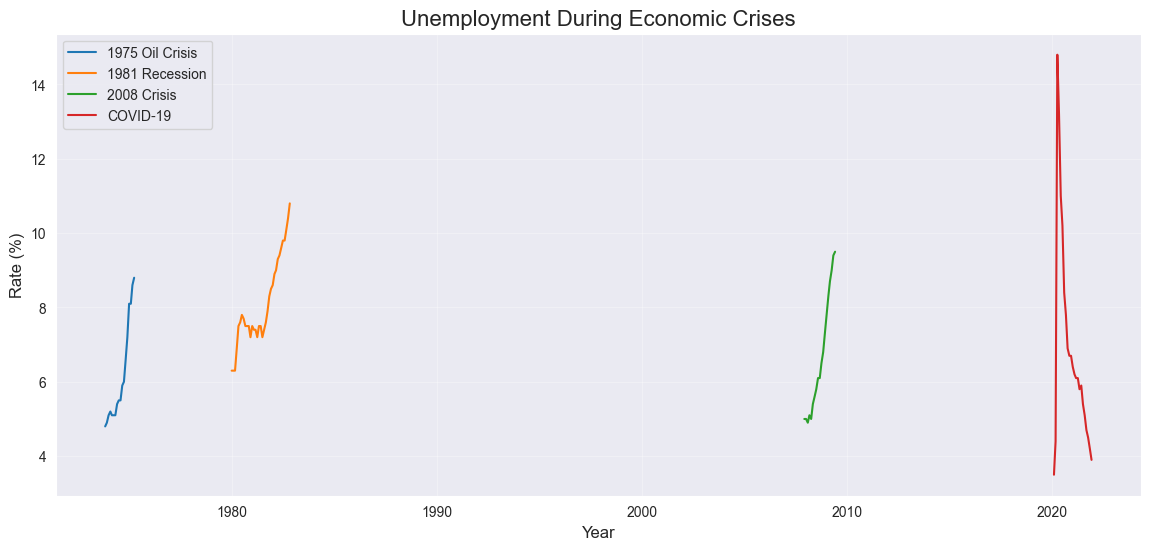

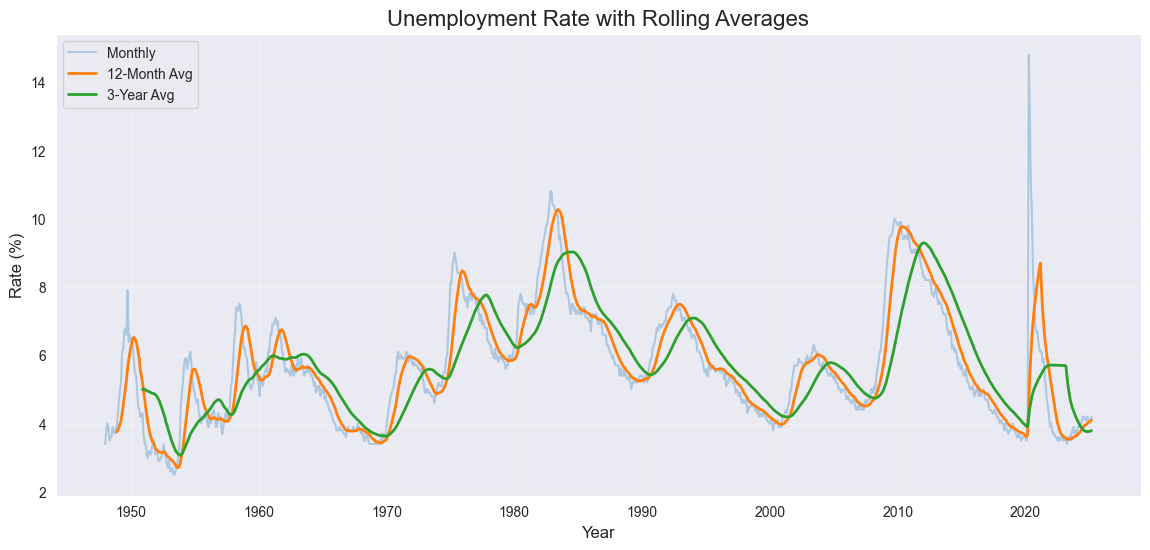

In [25]:
# =============================================
# Exploratory Data Analysis (EDA) - US Unemployment
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE"
df = pd.read_csv(url, parse_dates=['observation_date'])

# 2. Initial Inspection
print("=== Data Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("=== First 5 Rows ===")
print(df.head())

print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

# 3. Data Cleaning
df = df.rename(columns={'UNRATE': 'unemp_rate'})
df['year'] = df['observation_date'].dt.year
df['month'] = df['observation_date'].dt.month
df['decade'] = (df['year'] // 10) * 10

# 4. Basic Statistics
print("\n=== Statistical Summary ===")
print(df['unemp_rate'].describe())

# 5. Time Series Analysis
plt.figure(figsize=(14, 6))
plt.plot(df['observation_date'], df['unemp_rate'], color='#1f77b4')
plt.title('US Unemployment Rate (1948-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 6. Decadal Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='decade', y='unemp_rate', color='steelblue')
plt.title('Unemployment Distribution by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 7. Monthly Patterns
monthly_avg = df.groupby('month')['unemp_rate'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='#2ca02c')
plt.title('Average Unemployment by Month (1948-Present)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rate (%)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                   'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.show()

# 8. Crisis Period Comparison
crisis_periods = {
    '1975 Oil Crisis': ('1973-11-01', '1975-04-01'),
    '1981 Recession': ('1980-01-01', '1982-11-01'),
    '2008 Crisis': ('2007-12-01', '2009-06-01'),
    'COVID-19': ('2020-02-01', '2021-12-01')
}

plt.figure(figsize=(14, 6))
for label, (start, end) in crisis_periods.items():
    crisis_data = df[(df['observation_date'] >= start) & (df['observation_date'] <= end)]
    plt.plot(crisis_data['observation_date'], crisis_data['unemp_rate'], label=label)
    
plt.title('Unemployment During Economic Crises', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 9. Rolling Statistics
df['12mo_rolling'] = df['unemp_rate'].rolling(window=12).mean()
df['36mo_rolling'] = df['unemp_rate'].rolling(window=36).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['observation_date'], df['unemp_rate'], label='Monthly', alpha=0.3)
plt.plot(df['observation_date'], df['12mo_rolling'], label='12-Month Avg', linewidth=2)
plt.plot(df['observation_date'], df['36mo_rolling'], label='3-Year Avg', linewidth=2)
plt.title('Unemployment Rate with Rolling Averages', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()